In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Student Grades.xlsx')

In [3]:
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


## 1.Finding and handling missing/null values

In [7]:
df.dtypes

Student     object
Class       object
Year        object
Grade      float64
dtype: object

In [5]:
#unique value
df.value_counts()

Student  Class            Year       Grade
Isaac    Intro to SQL     Sophomore  96.0     3
Aaron    EDA              Junior     85.0     1
Joseph   Intro to Python  Freshman   93.0     1
Luke     Intro to SQL     Sophomore  76.0     1
Lucas    Intro to Python  Freshman   77.0     1
                                             ..
Eli      EDA              Junior     92.0     1
Dylan    Intro to Python  Freshman   84.0     1
David    Intro to Python  Freshman   74.0     1
Daniel   Intro to Python  Freshman   85.0     1
Zoey     EDA              Junior     91.0     1
Name: count, Length: 75, dtype: int64

In [6]:
#number of null values
df.isnull().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [15]:
# Remove leading/trailing spaces (if any)
df['Student'] = df['Student'].astype(str).str.strip()

# Replace 'nan' strings back to real NaN values
import numpy as np
df['Student'] = df['Student'].replace('nan', np.nan)


In [16]:
df['Student'].mode()


0    Isaac
Name: Student, dtype: object

In [19]:
df['Student'].fillna(df['Student'].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

Student    0
Class      3
Year       6
Grade      4
dtype: int64

In [24]:
df['Class'].value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [25]:
df[df['Class'].isnull()]

,Student,Class,Year,Grade
81,Isaac,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
85,Calvin,NaN,NaN,100.0


In [26]:
# Remove leading/trailing spaces (if any)
df['Class'] = df['Class'].astype(str).str.strip()

# Replace 'nan' strings back to real NaN values
import numpy as np
df['Class'] = df['Class'].replace('nan', np.nan)


In [27]:
df['Class'].mode()

0    Intro to Python
Name: Class, dtype: object

In [28]:
df['Class'].fillna(df['Class'].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

Student    0
Class      0
Year       6
Grade      4
dtype: int64

In [31]:
df['Class'].value_counts()

Class
Intro to Python              28
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [34]:
df['Year'].mode()

0    Freshman
Name: Year, dtype: object

In [32]:
df['Year'].fillna(df['Year'].mode()[0],inplace=True)

In [33]:
df.isnull().sum()

Student    0
Class      0
Year       0
Grade      4
dtype: int64

In [35]:
df['Grade'].describe()

count     82.000000
mean      85.707317
std       15.527346
min       45.000000
25%       81.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Grade, dtype: float64

In [36]:
#here 200 is a outlier so we can not use mean to replace null value
df['Grade'].fillna(df['Grade'].median(), inplace=True)


In [37]:
df.isnull().sum()

Student    0
Class      0
Year       0
Grade      0
dtype: int64

Note : in grade col we replace null values with median but there is a one outlier present so it is not a good practise to replace null values without removing outliers

## 2.Finding and handling inconsistent text/typos

In [138]:
#importing again the dataset so that what we have change that will not reflected in it
df=pd.read_excel('Student Grades.xlsx')
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


In [139]:
df.dtypes

Student     object
Class       object
Year        object
Grade      float64
dtype: object

Use Value_counts() for categorical data type and use decribe() for numerical data type

In [140]:
df.Student.value_counts()

Student
Isaac      3
Mia        2
Nathan     1
Landon     1
Chloe      1
          ..
Joseph     1
David      1
Lucas      1
Jackson    1
Calvin     1
Name: count, Length: 81, dtype: int64

In [141]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [142]:
df.Year.value_counts()

Year
Freshman     35
Sophomore    24
Junior       20
Senior        1
Name: count, dtype: int64

Here EDA and Exploratory Data Analysis is same , Intro to Python and Python is same , so we have to merge them in one

In [143]:
# so lets do for class 
df[df.Class.isin(['Exploratory Data Analysis','EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.0
59,Jack,Exploratory Data Analysis,Sophomore,84.0
60,Ella,Exploratory Data Analysis,Sophomore,200.0
61,Chloe,Exploratory Data Analysis,Sophomore,87.0
62,Landon,Exploratory Data Analysis,Junior,NaN
63,Christian,Exploratory Data Analysis,Junior,77.0
64,Jordan,Exploratory Data Analysis,Junior,83.0
65,Jonathan,Exploratory Data Analysis,Junior,82.0
66,Levi,Exploratory Data Analysis,Junior,91.0
67,Victoria,Exploratory Data Analysis,Junior,90.0


In [144]:
df[df.Class.isin(['Intro to Python','Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [145]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [146]:
# #method1: using np.where()..it is logical condition based 
df.Class=np.where(df.Class=='EDA','Exploratory Data Analysis',df.Class)
df.Class


In [147]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [148]:
# #method1: using np.where()..it is logical condition based 
df.Class=np.where(df.Class=='Python','Intro to Python',df.Class)
df.Class


In [149]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [150]:
df.Class

0     Freshman Seminar
1     Freshman Seminar
2     Freshman Seminar
3     Freshman Seminar
4     Freshman Seminar
            ...       
81                 NaN
82                 NaN
83                 EDA
84                 EDA
85                 NaN
Name: Class, Length: 86, dtype: object

In [151]:
#method 2: using map (mapping values)
class_mapping={'Intro to Python ':'Intro to Python ',
               'Intro to SQL ':'Intro to SQL ',
               'EDA':'Exploratory Data Analysis',
               'Freshman Seminar':'Freshman Seminar',
               'Exploratory Data Analysis': 'Exploratory Data Analysis',
               'Python':'Intro to Python'
}


In [152]:
df.Class=df.Class.map(class_mapping)

In [153]:
df.Class.value_counts()

Class
Exploratory Data Analysis    25
Freshman Seminar             12
Intro to Python               1
Name: count, dtype: int64

## 3.Finding and Handling duplicates 

In [5]:
df=pd.read_excel('Student Grades.xlsx')
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


In [6]:
df[df.duplicated()]

,Student,Class,Year,Grade
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [7]:
df.duplicated().sum()

2

In [13]:
#remove duplicate rows
df=df.drop_duplicates()

In [18]:
# #we can use inplace to update df
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df[df.duplicated()]

,Student,Class,Year,Grade


In [21]:
#after removing duplicates wee notice indexes are implaced so we have to handle them also 
df.iloc[40:45] #we can see duplicates are at 43 and 44 

,Student,Class,Year,Grade
40,Madison,Intro to SQL,Sophomore,71.0
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
45,Harper,Intro to SQL,Sophomore,93.0
46,Ryan,Intro to SQL,Sophomore,76.0


In [25]:
#lets arrange the indexes
# df.reset_index() #this will create new col 
df.reset_index(drop=True,inplace=True) #the use of drop will not create new col
df.iloc[40:45]

,Student,Class,Year,Grade
40,Madison,Intro to SQL,Sophomore,71.0
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Harper,Intro to SQL,Sophomore,93.0
44,Ryan,Intro to SQL,Sophomore,76.0


## 4.Identifying Outliers and handling 

Identifying with plots

In [4]:
df1=pd.read_excel('Student Grades.xlsx')
df1

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

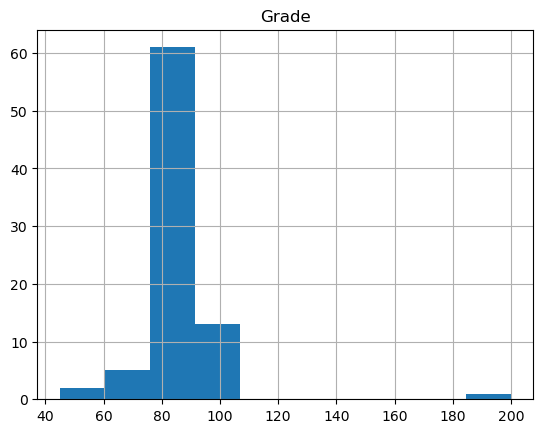

In [35]:
df1.hist() #1. histogram

In [37]:
df1.Grade.max()-df1.Grade.min()

155.0

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

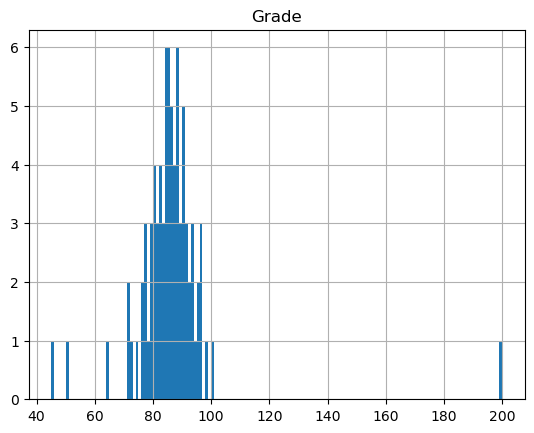

In [39]:
df1.hist(bins=155)

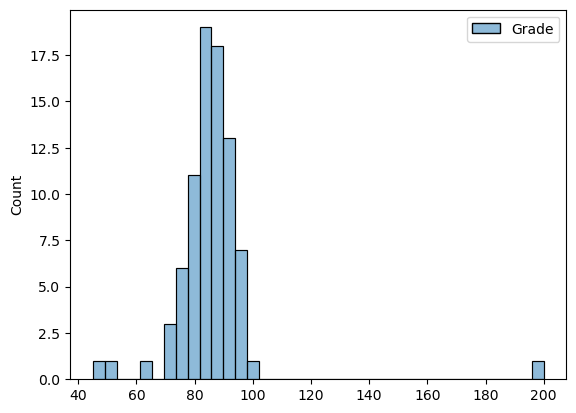

In [42]:
#2.seaborn
import seaborn as sns
sns.histplot(df1);
#we can observe there is outliers in the range between 40-60

<Axes: ylabel='Count'>

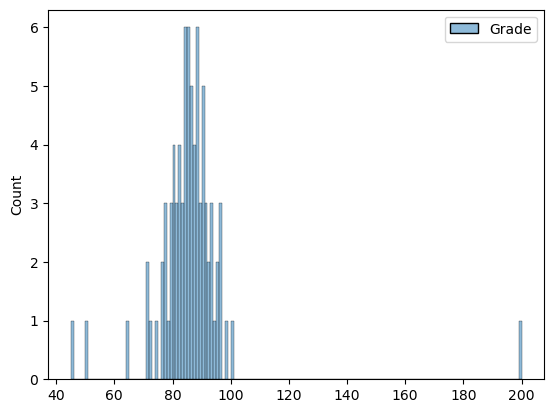

In [43]:
sns.histplot(df1,binwidth=1)

<Axes: xlabel='Grade'>

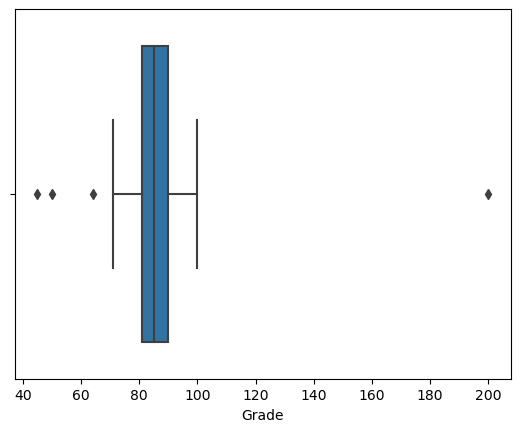

In [44]:
sns.boxplot(x=df1.Grade)

lets calculate quantile

In [45]:
import numpy as np

In [46]:
q25,q50,q75=np.percentile(df.Grade,(25,50,75))

In [51]:
Iqr=q75-q25
Iqr

nan

In [48]:
min_val=q25-1.5*Iqr

In [49]:
max_val=q75+1.5*Iqr

In [50]:
min_val,q25,q50,q75,max_val

(nan, nan, nan, nan, nan)

As we take completly take new dataset without cleaning for null values that's why we are getting this, first clean dataset then apply this concept of outliers

### 3.standard deviation
usually use for normally distributed data


In [56]:
mean_val=np.mean(df1.Grade)
sd=np.std(df1.Grade)

In [57]:
mean_val,sd

(85.70731707317073, 15.432376328465006)

In [61]:
#search for outliers
[i for i in df1.Grade if(i<mean_val-3*sd)or (i>mean_val+3*sd)]

[200.0]

In [62]:
[i for i in df1.Grade if(i<mean_val-2*sd)or (i>mean_val+2*sd)]

[50.0, 45.0, 200.0]

In [63]:
[i for i in df1.Grade if(i<mean_val-4*sd)or (i>mean_val+4*sd)]

[200.0]

In [65]:
df1.Grade.sort_values() # clearlyl see 200 is an outlier

56     45.0
37     50.0
69     64.0
40     71.0
36     71.0
      ...  
60    200.0
62      NaN
81      NaN
82      NaN
84      NaN
Name: Grade, Length: 86, dtype: float64

#### Handling outliers

Like with missing data, there are multiple ways to handle outliers:

Keep outliers

Remove an entire row or column with outliers

Impute outliers with NaN or a substitute like the average, mode, max, etc.

Resolve outliers based on your domain expertise

In [5]:
#1.keep outliers as it is in dataset
df1[df1.Grade<60]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0


In [9]:
df1.shape

(86, 4)

In [8]:
#2.drop rows containg outliers
df1.drop([37,56])

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


In [14]:
#3. replcae outliers with minimum Grade(min value in dataset)
min_grade=df1[df1.Grade>=60].Grade.min()
min_grade

64.0

In [8]:
import numpy as np

In [21]:
df1.Grade=np.where(df1.Grade<60,min_grade,df1.Grade)
df1.Grade

0      86.0
1      86.0
2      86.0
3      87.0
4      90.0
      ...  
81      NaN
82      NaN
83     84.0
84      NaN
85    100.0
Name: Grade, Length: 86, dtype: float64

In [27]:
#coonfirm
# df1[df1.Grade<60]
df1.loc[[37,56]]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0
56,Wyatt,Intro to SQL,Sophomore,64.0


## 5. Creating new col(text,numeric,datetime)

### a.create new numeric col
Claculating percentange,applying conditional cal

In [2]:
#we take groceries dataset
df=pd.read_excel('Groceries.xlsx')
df.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


In [34]:
#to applying any mathematical cal in any col
#example
df.Price_Dollars*1.05
#round off
round(df.Price_Dollars*1.05,2)

0      1.58
1      0.42
2      4.20
3      1.04
4      4.19
5      6.29
6      1.87
7      2.10
8      2.09
9      1.04
10     9.44
11    11.01
12     8.39
13     3.68
14     3.45
15     4.71
16     1.05
17     1.58
18     2.62
19     5.66
20     3.14
21     7.34
22     5.21
23    11.54
24     8.36
Name: Price_Dollars, dtype: float64

In [3]:
#create new col (do not use df.New_col)
df['New_col']=round(df.Price_Dollars*1.05,2)

In [20]:
df.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_col,Total Inventory,Pecentage Inventory,Inventory Flag,LastUpdatedTiime,Next_Scheduled_Date,Shipment_Date_Dow
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,2023-06-15,3
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,2023-06-15,3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,2023-06-15,3
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,2023-06-15,3
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,2023-06-15,3


In [5]:
 df['Total Inventory']=df.Inventory.sum()

In [9]:
#percentage
df['Pecentage Inventory']=round(df['Inventory']/df['Total Inventory']*100,2)

In [10]:
df['Inventory Flag']=np.where(df.Inventory<50,'Low Inventory','')

In [23]:
df.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New_col,Total Inventory,Pecentage Inventory,Inventory Flag,LastUpdatedTiime,Next_Scheduled_Date,Shipment_Date_Dow
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,2023-06-15,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,2023-06-15,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,2023-06-15,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,2023-06-15,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,2023-06-15,Thursday


### b.create new datetime col
extracting datetime components,applying datetime cal

use dt.component to extract component from datetime value 
syntax

df[col_name_date].dt.day   extract day from date /n
df[col_name_date].dt.dayofweek   extract day of week /n
df[col_name_date].dt.time extract time

In [13]:
df['LastUpdatedTiime']=df.Last_Updated.dt.time

In [19]:
df['Shipment_Date_Dow']=df.Next_Scheduled_Shipment.dt.dayofweek 
#this will nemreic value

In [21]:
#to get actual name of day
dow_mapping={
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thursday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday'
}

In [22]:
df['Shipment_Date_Dow']=df['Shipment_Date_Dow'].map(dow_mapping)

In [48]:
df

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Pecentage Inventory,Inventory Flag,LastUpdatedTiime,Next_Scheduled_Date,Shipment_Date_Dow,Product_Id_No,SubCategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,7.19,,15:35:00,2023-06-15,Thursday,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,10.29,,18:30:00,2023-06-15,Thursday,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.12,,17:22:00,2023-06-15,Thursday,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.03,,16:29:00,2023-06-15,Thursday,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,3.05,,18:10:00,2023-06-15,Thursday,100014,Fruit
5,P100015,Produce,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,2.04,,19:15:00,2023-06-15,Thursday,100015,Fruit
6,P100016,Produce,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,1.61,,19:25:00,2023-06-15,Thursday,100016,Vegetable
7,P100017,Produce,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,4.12,,18:05:00,2023-06-15,Thursday,100017,Vegetable
8,P100018,Produce,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15,1.03,,16:42:00,2023-06-15,Thursday,100018,Vegetable
9,P100019,Produce,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15,4.74,,17:47:00,2023-06-15,Thursday,100019,Vegetable


### c. create new text col
extracting text,splitting into multiple col,finding patterns

In [26]:
# frist three cols are text
#make make col purely text , rmeove P letter
df['Product_Id_No']=df.Product_ID.str[1:]

In [28]:
df.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New_col                           float64
Total Inventory                     int64
Pecentage Inventory               float64
Inventory Flag                     object
LastUpdatedTiime                   object
Next_Scheduled_Date                object
Shipment_Date_Dow                  object
Product_Id_No                      object
dtype: object

In [31]:
#change dtype from object to int
df['Product_Id_No']=df['Product_Id_No'].astype('int')
df.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New_col                           float64
Total Inventory                     int64
Pecentage Inventory               float64
Inventory Flag                     object
LastUpdatedTiime                   object
Next_Scheduled_Date                object
Shipment_Date_Dow                  object
Product_Id_No                       int32
dtype: object

In [33]:
df.Category.value_counts()

Category
Produce: Fruit           6
Produce: Vegetable       4
Produce: Dairy           4
Pantry: Snacks           4
Produce: Meat            3
Frozen: Frozen Snacks    2
Frozen: Frozen Fruit     2
Name: count, dtype: int64

In [34]:
#split
df.Category.str.split(':')

0            [Produce,  Fruit]
1            [Produce,  Fruit]
2            [Produce,  Fruit]
3            [Produce,  Fruit]
4            [Produce,  Fruit]
5            [Produce,  Fruit]
6        [Produce,  Vegetable]
7        [Produce,  Vegetable]
8        [Produce,  Vegetable]
9        [Produce,  Vegetable]
10            [Produce,  Meat]
11            [Produce,  Meat]
12            [Produce,  Meat]
13           [Produce,  Dairy]
14           [Produce,  Dairy]
15           [Produce,  Dairy]
16           [Produce,  Dairy]
17           [Pantry,  Snacks]
18           [Pantry,  Snacks]
19           [Pantry,  Snacks]
20           [Pantry,  Snacks]
21    [Frozen,  Frozen Snacks]
22    [Frozen,  Frozen Snacks]
23     [Frozen,  Frozen Fruit]
24     [Frozen,  Frozen Fruit]
Name: Category, dtype: object

In [36]:
#to make into two diff cols
pd.DataFrame(df.Category.str.split(':').to_list())

,0,1
0,Produce,Fruit
1,Produce,Fruit
2,Produce,Fruit
3,Produce,Fruit
4,Produce,Fruit
5,Produce,Fruit
6,Produce,Vegetable
7,Produce,Vegetable
8,Produce,Vegetable
9,Produce,Vegetable


In [37]:
df[['Category','SubCategory']]=pd.DataFrame(df.Category.str.split(':').to_list())

In [44]:
df.drop('New_col', axis=1, inplace=True)



In [47]:
df.drop('Total Inventory', axis=1, inplace=True)

In [49]:
#Reoder all cols 
df[['Product_ID','Product_Id_No','Category','SubCategory',
    'Price_Dollars','Inventory','Pecentage Inventory','Inventory Flag','Last_Updated',
    'LastUpdatedTiime',
    'Next_Scheduled_Shipment','Shipment_Date_Dow'
    
]].head()

,Product_ID,Product_Id_No,Category,SubCategory,Price_Dollars,Inventory,Pecentage Inventory,Inventory Flag,Last_Updated,LastUpdatedTiime,Next_Scheduled_Shipment,Shipment_Date_Dow
0,P100010,100010,Produce,Fruit,1.50,349,7.19,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,0.40,500,10.29,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,4.00,200,4.12,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,0.99,50,1.03,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,3.99,148,3.05,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


In [ ]:
#save this clean df. pickle file formate

In [50]:
groceries_with_new_cols=df[['Product_ID','Product_Id_No','Category','SubCategory',
    'Price_Dollars','Inventory','Pecentage Inventory','Inventory Flag','Last_Updated',
    'LastUpdatedTiime',
    'Next_Scheduled_Shipment','Shipment_Date_Dow'
    
]]

In [51]:
groceries_with_new_cols.to_pickle('groceries_with_new_columna.pkl')